<a href="https://colab.research.google.com/github/mushrafi88/MSE_510/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Mushrafi Munim Sushmit

Homework 2 for the MSE510/420 Course
- Instructor Sergei V. Kalinin, sergei2@utk.edu
- Please provide your name in the beginning of the notebook
- To submit the homework, please share it with my gmail address (available on Canvas)


Problem 1: Making function
- define an (arbitrary) scalar function  
- plot a graph over a chosen range
- create an array of sampled points (e.g. 7)
- show the points on the graph

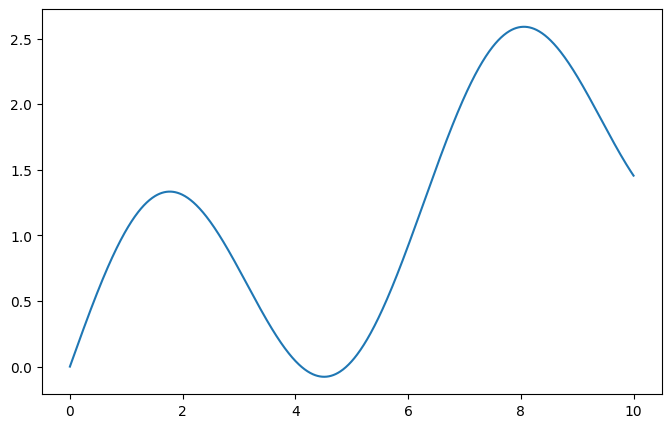

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) + 0.2*x

x_plot = np.linspace(0, 10, 1000)
y_plot = f(x_plot)

plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, label="f(x)")


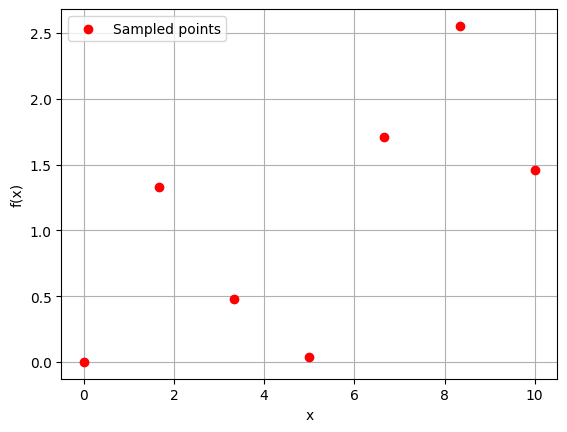

In [3]:
x_sample = np.linspace(0, 10, 7)
y_sample = f(x_sample)
plt.scatter(x_sample, y_sample, color='red', zorder=3, label="Sampled points")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


Problem 2: Spline interpolation
- Interpolate the function using spline method
- Plot the difference between original and interpolated function
- Differentiate the function (analytically or numerically)
- Differentiate the interpolated function
- Compare the results

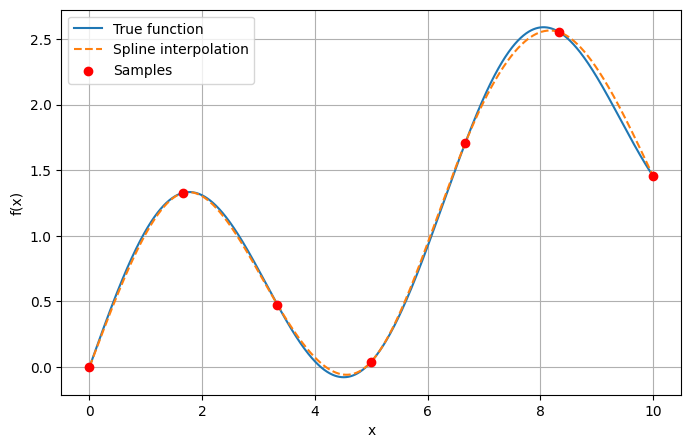

In [4]:
from scipy.interpolate import CubicSpline

x_dense = np.linspace(x_sample[0], x_sample[-1], 1000)
spline = CubicSpline(x_sample, y_sample, bc_type="natural")
y_spline = spline(x_dense)

plt.figure(figsize=(8,5))
plt.plot(x_dense, f(x_dense), label="True function")
plt.plot(x_dense, y_spline, '--', label="Spline interpolation")
plt.scatter(x_sample, y_sample, color='red', zorder=3, label="Samples")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


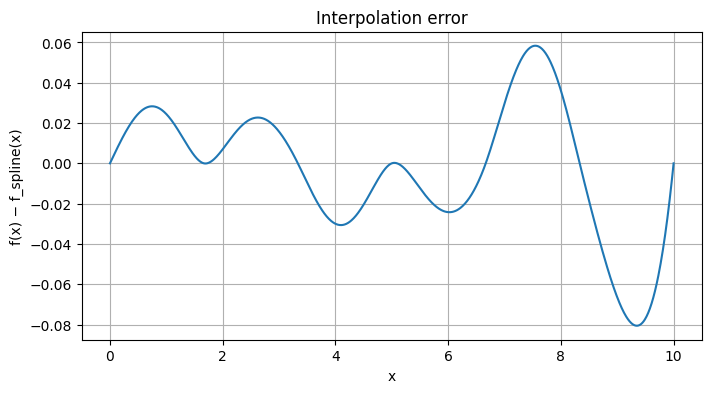

In [5]:
error = f(x_dense) - y_spline

plt.figure(figsize=(8,4))
plt.plot(x_dense, error)
plt.xlabel("x")
plt.ylabel("f(x) − f_spline(x)")
plt.title("Interpolation error")
plt.grid(True)
plt.show()


In [6]:
import sympy as sp

x = sp.symbols('x')
f_sym = sp.sin(x) + 0.2*x
df_sym = sp.diff(f_sym, x)
df_exact = sp.lambdify(x, df_sym, modules="numpy")

df_sym


cos(x) + 0.2

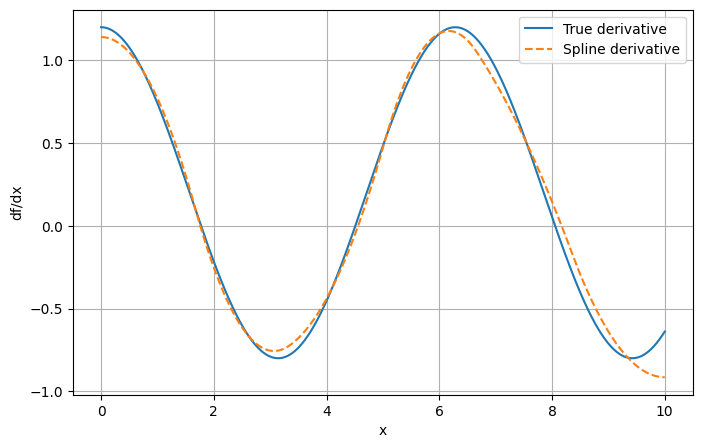

In [7]:
df_true = df_exact(x_dense)
df_spline = spline.derivative()(x_dense)
plt.figure(figsize=(8,5))
plt.plot(x_dense, df_true, label="True derivative")
plt.plot(x_dense, df_spline, '--', label="Spline derivative")
plt.xlabel("x")
plt.ylabel("df/dx")
plt.legend()
plt.grid(True)
plt.show()


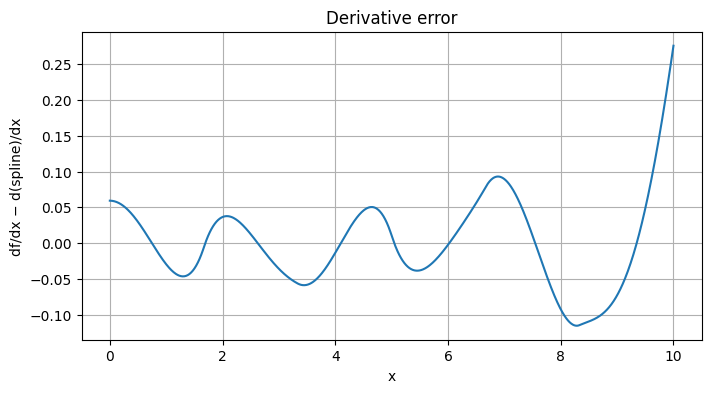

In [8]:
deriv_error = df_true - df_spline

plt.figure(figsize=(8,4))
plt.plot(x_dense, deriv_error)
plt.xlabel("x")
plt.ylabel("df/dx − d(spline)/dx")
plt.title("Derivative error")
plt.grid(True)
plt.show()


Problem 3: Linear interpolation
- Interpolate the function using linear method
- Plot the difference between original and interpolated function
- Differentiate the function (analytically or numerically)
- Differentiate the interpolated function
- Compare the results

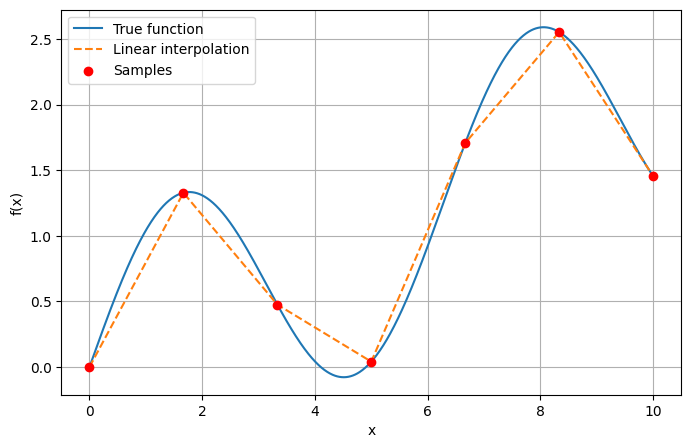

In [9]:
from scipy.interpolate import interp1d

linear_interp = interp1d(
    x_sample,
    y_sample,
    kind="linear",
    fill_value="extrapolate"
)

y_linear = linear_interp(x_dense)

plt.figure(figsize=(8,5))
plt.plot(x_dense, f(x_dense), label="True function")
plt.plot(x_dense, y_linear, '--', label="Linear interpolation")
plt.scatter(x_sample, y_sample, color='red', zorder=3, label="Samples")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


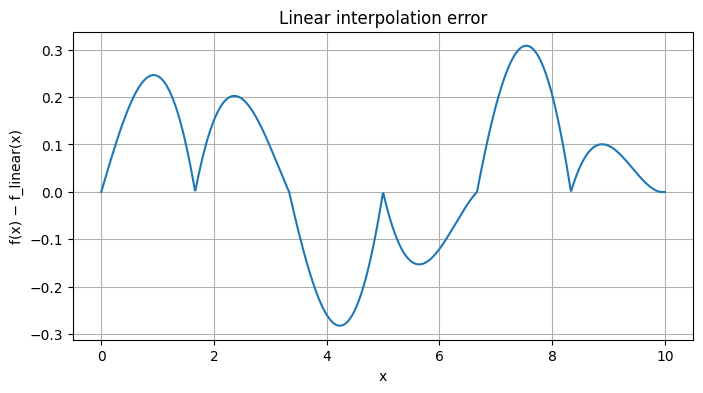

In [10]:
error_linear = f(x_dense) - y_linear

plt.figure(figsize=(8,4))
plt.plot(x_dense, error_linear)
plt.xlabel("x")
plt.ylabel("f(x) − f_linear(x)")
plt.title("Linear interpolation error")
plt.grid(True)
plt.show()


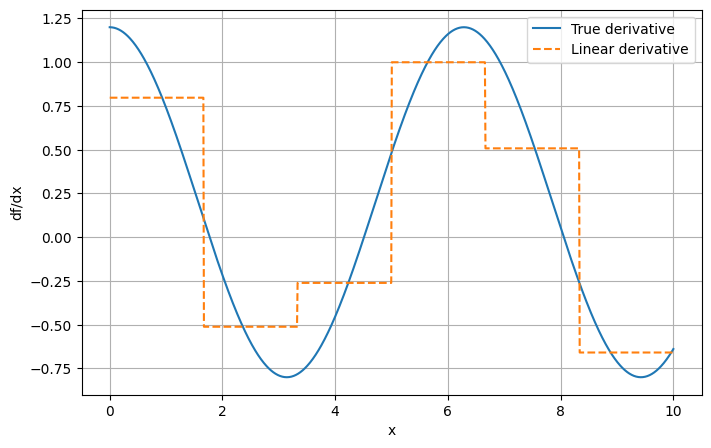

In [11]:
slopes = np.diff(y_sample) / np.diff(x_sample)

df_linear = np.zeros_like(x_dense)

for i in range(len(slopes)):
    mask = (x_dense >= x_sample[i]) & (x_dense < x_sample[i+1])
    df_linear[mask] = slopes[i]

# last point
df_linear[x_dense >= x_sample[-1]] = slopes[-1]

plt.figure(figsize=(8,5))
plt.plot(x_dense, df_true, label="True derivative")
plt.plot(x_dense, df_linear, '--', label="Linear derivative")
plt.xlabel("x")
plt.ylabel("df/dx")
plt.legend()
plt.grid(True)
plt.show()


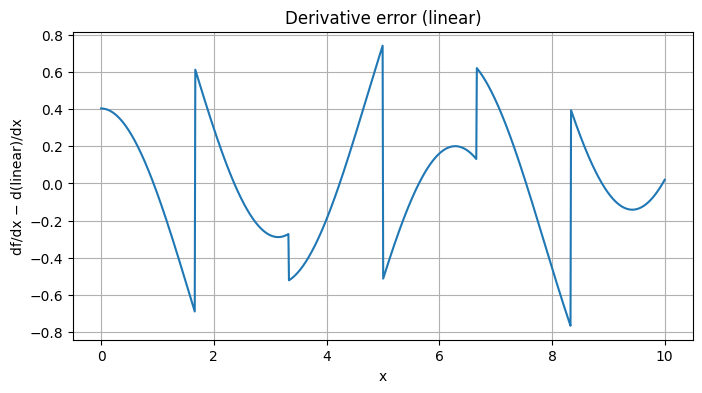

In [12]:
deriv_error_linear = df_true - df_linear

plt.figure(figsize=(8,4))
plt.plot(x_dense, deriv_error_linear)
plt.xlabel("x")
plt.ylabel("df/dx − d(linear)/dx")
plt.title("Derivative error (linear)")
plt.grid(True)
plt.show()


Problem 4: Lagrange polynomial interpolation
- Interpolate the function using Lagrange polynomial method
- Plot the difference between original and interpolated function
- Differentiate the function (analytically or numerically)
- Differentiate the interpolated function
- Compare the results

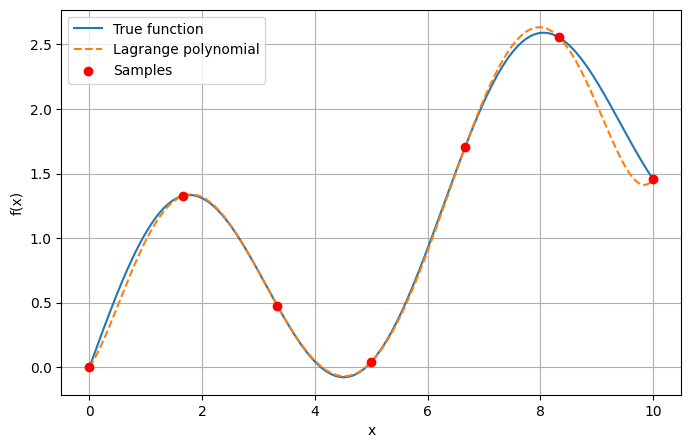

In [13]:
poly = np.polyfit(x_sample, y_sample, deg=len(x_sample)-1)
p = np.poly1d(poly)

y_poly = p(x_dense)

plt.figure(figsize=(8,5))
plt.plot(x_dense, f(x_dense), label="True function")
plt.plot(x_dense, y_poly, '--', label="Lagrange polynomial")
plt.scatter(x_sample, y_sample, color='red', zorder=3, label="Samples")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


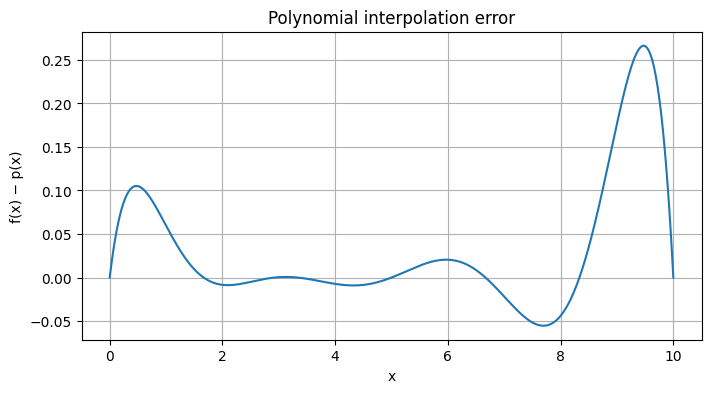

In [14]:
error_poly = f(x_dense) - y_poly

plt.figure(figsize=(8,4))
plt.plot(x_dense, error_poly)
plt.xlabel("x")
plt.ylabel("f(x) − p(x)")
plt.title("Polynomial interpolation error")
plt.grid(True)
plt.show()


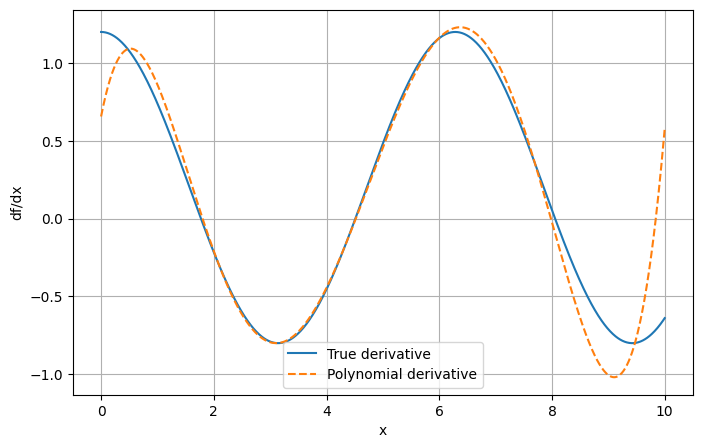

In [15]:
dp = np.polyder(p)
df_poly = dp(x_dense)
plt.figure(figsize=(8,5))
plt.plot(x_dense, df_true, label="True derivative")
plt.plot(x_dense, df_poly, '--', label="Polynomial derivative")
plt.xlabel("x")
plt.ylabel("df/dx")
plt.legend()
plt.grid(True)
plt.show()


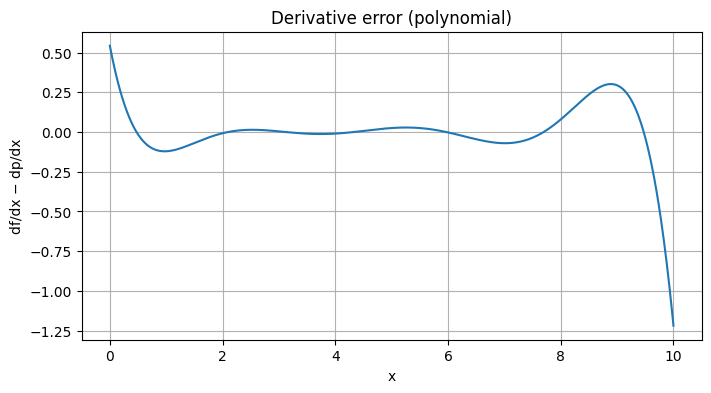

In [16]:
deriv_error_poly = df_true - df_poly

plt.figure(figsize=(8,4))
plt.plot(x_dense, deriv_error_poly)
plt.xlabel("x")
plt.ylabel("df/dx − dp/dx")
plt.title("Derivative error (polynomial)")
plt.grid(True)
plt.show()


Problem 5:
Compare spline, linear, and Lagrange methods in terms of:
- how well they reproduce the function
- how well they reproduce the derivative
- how computationally expensive we expect them to be
- how can spline method be improved?

In [17]:
import time

def f(x):
    return np.sin(x) + 0.2*x

def df_exact(x):
    return np.cos(x) + 0.2

N = 8
x_sample = np.linspace(0, 10, N)
y_sample = f(x_sample)

x_dense = np.linspace(0, 10, 2000)

#linear
t0 = time.perf_counter()
lin = interp1d(x_sample, y_sample, kind="linear", fill_value="extrapolate")
y_lin = lin(x_dense)
t_lin = time.perf_counter() - t0

slopes = np.diff(y_sample) / np.diff(x_sample)
df_lin = np.zeros_like(x_dense)
for i in range(len(slopes)):
    mask = (x_dense >= x_sample[i]) & (x_dense < x_sample[i+1])
    df_lin[mask] = slopes[i]
df_lin[x_dense >= x_sample[-1]] = slopes[-1]

#spline
t0 = time.perf_counter()
spline = CubicSpline(x_sample, y_sample, bc_type="natural")
y_spline = spline(x_dense)
df_spline = spline.derivative()(x_dense)
t_spline = time.perf_counter() - t0

#lagrange
t0 = time.perf_counter()
poly = np.poly1d(np.polyfit(x_sample, y_sample, deg=N-1))
y_poly = poly(x_dense)
df_poly = np.polyder(poly)(x_dense)
t_poly = time.perf_counter() - t0


In [18]:
err_lin = np.linalg.norm(f(x_dense) - y_lin)
err_spline = np.linalg.norm(f(x_dense) - y_spline)
err_poly = np.linalg.norm(f(x_dense) - y_poly)


In [19]:
derr_lin = np.linalg.norm(df_exact(x_dense) - df_lin)
derr_spline = np.linalg.norm(df_exact(x_dense) - df_spline)
derr_poly = np.linalg.norm(df_exact(x_dense) - df_poly)

In [20]:
print("Function error (L2 norm)")
print(f"Linear   : {err_lin:.3e}")
print(f"Spline   : {err_spline:.3e}")
print(f"Polynomial: {err_poly:.3e}\n")

print("Derivative error (L2 norm)")
print(f"Linear   : {derr_lin:.3e}")
print(f"Spline   : {derr_spline:.3e}")
print(f"Polynomial: {derr_poly:.3e}\n")

print("Execution time (seconds)")
print(f"Linear   : {t_lin:.3e}")
print(f"Spline   : {t_spline:.3e}")
print(f"Polynomial: {t_poly:.3e}")


Function error (L2 norm)
Linear   : 5.447e+00
Spline   : 8.754e-01
Polynomial: 2.155e+00

Derivative error (L2 norm)
Linear   : 1.223e+01
Spline   : 2.037e+00
Polynomial: 5.559e+00

Execution time (seconds)
Linear   : 9.999e-04
Spline   : 2.635e-03
Polynomial: 1.404e-03


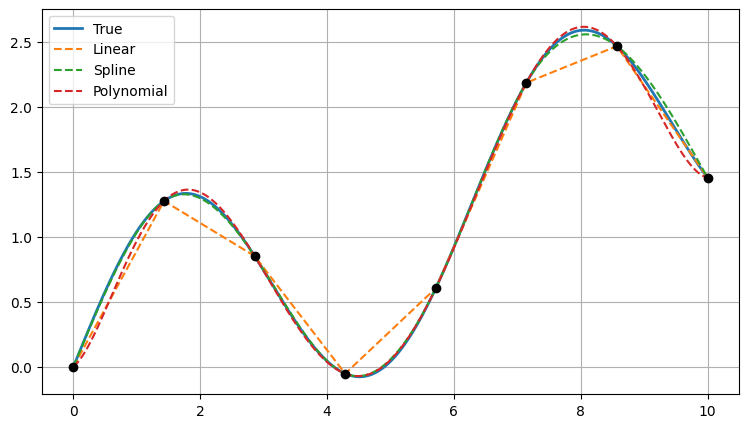

In [21]:
plt.figure(figsize=(9,5))
plt.plot(x_dense, f(x_dense), label="True", linewidth=2)
plt.plot(x_dense, y_lin, "--", label="Linear")
plt.plot(x_dense, y_spline, "--", label="Spline")
plt.plot(x_dense, y_poly, "--", label="Polynomial")
plt.scatter(x_sample, y_sample, color="black", zorder=3)
plt.legend()
plt.grid()
plt.show()


So, spline interpolation gives the best balance of accuracy, smoothness, and scalability.

To improve spline,

(a) Better boundary conditions

(b) Adaptive sampling based on density of points.

(c) Regularization / smoothing splines on certain locations

(d) Higher-order splines to interpolate more accurately

Problem 6: Integration
- Integrate the original and (one of the) interpolated functions
- Compare the answers

In [28]:
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.integrate import quad, simpson

def F_exact(x):
  return -np.cos(x) + 0.1*x**2

a, b = 0.0, 10.0
I_exact = F_exact(b) - F_exact(a)

x_sample = np.linspace(a, b, 7)
y_sample = f(x_sample)

spline = CubicSpline(x_sample, y_sample, bc_type="natural")
x_dense = np.linspace(a, b, 2000)
I_spline = spline.integrate(a, b)
I_spline_simpson = simpson(spline(x_dense), x_dense)



In [30]:
print("Exact integral        :", I_exact)
print("Spline integral       :", I_spline)
print("Spline (Simpson)      :", I_spline_simpson)

print("\nAbsolute errors")
print("Spline (analytic)     :", abs(I_exact - I_spline))
print("Spline (Simpson)      :", abs(I_exact - I_spline_simpson))


Exact integral        : 11.839071529076453
Spline integral       : 11.868050190363764
Spline (Simpson)      : 11.86805019038994

Absolute errors
Spline (analytic)     : 0.028978661287311525
Spline (Simpson)      : 0.02897866131348792


Problem 7. Finding  roots:
- Find the root of the equation y = (2 * x + 3) * np.exp(-x) + np.log(x)-1.7 on the interval [0.1, 10]
- Do you expect there will be roots for x > 10? Why?

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (2*x + 3)*np.exp(-x) + np.log(x) - 1.7

def df(x):
    return -(2*x + 1)*np.exp(-x) + 1/x

In [38]:
def bisection(a, b, tol=1e-8, max_iter=100):
    if f(a)*f(b) > 0:
        raise ValueError("No sign change in interval")

    for i in range(max_iter):
        c = 0.5*(a+b)
        if abs(f(c)) < tol or (b-a)/2 < tol:
            return c, i
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return c, max_iter

def secant(x0, x1, tol=1e-8, max_iter=100):
    for i in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if abs(f1 - f0) < 1e-14:
            break
        x2 = x1 - f1*(x1-x0)/(f1-f0)
        if abs(f(x2)) < tol:
            return x2, i
        x0, x1 = x1, x2
    return x2, max_iter

def newton(x0, tol=1e-8, max_iter=100):
    x = x0
    for i in range(max_iter):
        if abs(df(x)) < 1e-10:
            raise ValueError("Derivative too small")
        x_new = x - f(x)/df(x)
        if abs(f(x_new)) < tol:
            return x_new, i
        x = x_new
    return x, max_iter


In [39]:
x_scan = np.linspace(0.1, 10, 2000)
y_scan = f(x_scan)

intervals = []
for i in range(len(x_scan)-1):
    if y_scan[i]*y_scan[i+1] < 0:
        intervals.append((x_scan[i], x_scan[i+1]))

print("Sign-change intervals:", intervals)


Sign-change intervals: [(np.float64(0.46153076538269133), np.float64(0.46648324162081045)), (np.float64(1.6946973486743373), np.float64(1.6996498249124565)), (np.float64(5.022761380690345), np.float64(5.0277138569284645))]


In [40]:
print("\nRoot near x ≈ 1.7")
r1_b, it1_b = bisection(1.6, 1.8)
r1_s, it1_s = secant(1.6, 1.8)
r1_n, it1_n = newton(1.7)

print("Bisection:", r1_b, "iters:", it1_b)
print("Secant:   ", r1_s, "iters:", it1_s)
print("Newton:   ", r1_n, "iters:", it1_n)


print("\nRoot near x ≈ 5.05")
r2_b, it2_b = bisection(4.9, 5.2)
r2_s, it2_s = secant(4.9, 5.2)
r2_n, it2_n = newton(5.0)

print("Bisection:", r2_b, "iters:", it2_b)
print("Secant:   ", r2_s, "iters:", it2_s)
print("Newton:   ", r2_n, "iters:", it2_n)



Root near x ≈ 1.7
Bisection: 1.6990854263305666 iters: 19
Secant:    1.699085451506571 iters: 2
Newton:    1.6990854276184806 iters: 1

Root near x ≈ 5.05
Bisection: 5.023538827896118 iters: 20
Secant:    5.023538807456745 iters: 2
Newton:    5.023538804855543 iters: 1


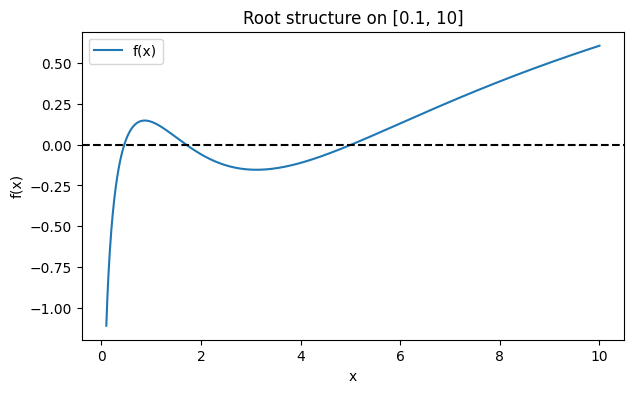

In [41]:
x = np.linspace(0.1, 10, 1000)
y = f(x)

plt.figure(figsize=(7,4))
plt.plot(x, y, label="f(x)")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Root structure on [0.1, 10]")
plt.legend()
plt.show()


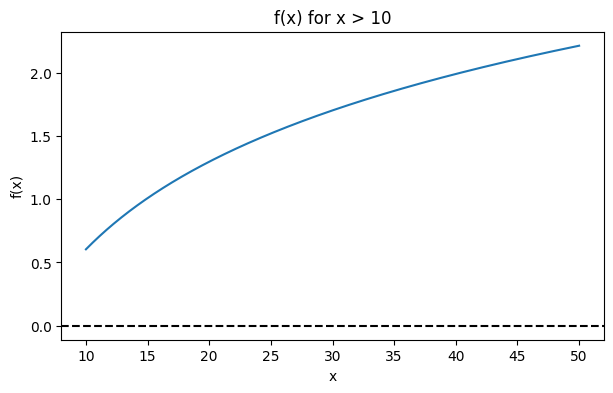

In [42]:
x_far = np.linspace(10, 50, 500)

plt.figure(figsize=(7,4))
plt.plot(x_far, f(x_far))
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) for x > 10")
plt.show()


So, for x>10, The function keeps on increasing. So there cannot be any roots after this interval

Note that for the subsequent 3 problems the answers can be correct and non-unique. So the important thing is to explain your logic.

Problem 8. Consider a ternary phase diagram of the system AxByC1-x-y as a function of (x,y,T,P), where T is temperature and P is pressure
- What is the dimensionality of the parameter space?
- Is the parameter space differentiable?
- Choose some function over this parameter space - it can be indicator function indicating the presence of some phase, or weight fraction of some phase, oe even mechanical or electric properties of th esystem
- Is this function continuous?
- Is this function differentiable?
- Can this function be interpolated, if we have measurements at certain points?
- Can this function be integrated?

Answer 8:


1.   x, y, T, P are independent. So dimensionality is 4
2.   Since its smooth (excluding the boundary), it is differentiable.

3. We can choose mass fraction of a specific phase as a function of x, y, T, P

4. This will be continuous except the phase boundaries.

5. The function's differential is discontinuos at the phase boundaries.

6. Yes, if we can somehow account for the kinks at the phase boundaries.

7. If the function is piecewise continuous, which it is. It should be integrable.


Problem 9. Consider charging of the battery, where charging is induced by applying bias over time, V(t).
- What is the dimensionality of the parameter space?
- Is the parameter space differentiable?
- Choose some function over this parameter space - it can be state of charge after charging or state of health. Or probability of thermal runaway.
- Is this function continuous?
- Is this function differentiable?
- Can this function be interpolated, if we have measurements at certain points?
- Can this function be integrated?

Answer 9:



1. The parameter space is 2D consisting of (t,V)

2. Yes, its differentiable cause the function is well defined and smooth.

3. State of charge.

4. Yes, this is continuous. Since, Since the state of charge should not jump instantaneously.

5. Unless it has some phase transitions, it will be differentiable.

6. Yes, if we have some discrete set of points, we can use spline to interpolate it.

7. Since the function is smooth, it will be integratable.



Problem 10. Consider the chemical space of small molecules, https://en.wikipedia.org/wiki/Chemical_space .
- What is the dimensionality of the parameter space?
- Is the parameter space differentiable?
- Choose some function over this parameter space - it can be anything from molecular weight to enthalpy of formation, HOMO-LUMO gap, etc/
- Is this function continuous?
- Is this function differentiable?
- Can this function be interpolated, if we have measurements at certain points?
- Can this function be integrated?

Answer 10:

1. According to the wikipedia, the chemical space can be of many forms. Assuming Coordinate spaces for small particles, The dimension space is 3N.

2. Yes. In coordinate space, the parameters are real numbers, So they can be differentiated.

3. The simplest function is then the Potential Energy (V).

4. Potential Energy is smooth, so it is continuous.

5. Since its continuous and smooth everywhere, its differentiable.

6. Yes, it can be interpolated.

7. Since its both continuous and smooth, it can also be integrated.